# Introduction

## Problem Definition:
* **Type of Problem**: Multi-Class Classification in Supervised Learning. The task involves categorizing playlists into one of several Myers-Briggs Type Indicator (MBTI) personality types based on their musical features.
* **Primary Goal**: Accuraly predict the MBTI type (e.g., 'INFP', 'ESTJ', etc.) of playlist by analyzing their musical characteristics. This endeavor aims to uncover potential links between musical preferences and personality types, paving the way for innovations in personalized music recommedations and psychological research.
* **Motivation**: The project is driven by the hypothesis that music preferences can reflect underlying personality traits. Validating this could revolutionize how music streaming services tailor content to individual users and provide new insights for psychological profiling.
* **Why It's Important**: Understanding the correlation between music and personality types could enhance the personalization of music streaming services, contribute to psychological studies of personality, and offer a novel perspective on the interaction between human psychology and musical perferences.
* **Learning Outcomes**: Through this project, I aim to gain deeper insights into machine learning techniques for multi-class classification, explore the practical appliaction of these techniques in analyzing complex relationships between data sets, and understand the intricacies of predicting psychological traits from seemingly unrelated data. 
* **Input Features**: Includes quantitative attributes of songs in each playlist, such as the mean and standard deviation of danceability, energy, loudness, and other relevant characteristics, along with count of songs in different musical keys.
* **Output**: A categorical label that identifies the MBTI personality type of the playlist.
* **Approach**: Utilization of a supervised learning classifier to analyze playlists with known MBTI types, which then guide the prediction of MBTI type for new, unseen playlists.
* **Algorithms Under Consideration**: Selection among Support Vector Machines (SVMs), Decision Trees, Random Forests, and Neural Networks, chosen for their proficiency in handling multi-class classification tasks and high-dimensional data.
* **Evaluation Metrics**: Use of Accuracy, Precision, Recall, and F1-Score to measure the effectiveness and realiblity of the model.
* **Training and Testing Strategy**: The model will be trained on a dataset with pre-labeled MBTI types and subsequently tested on a separate dataset to evaluate its predictive accuracy. 

### Dataset Citation: 

Le, T.(2023). *Spotify MBTI Playlists*. Kaggle. Retrieved January 20, 2024, from https://www.kaggle.com/datasets/xtrnglc/spotify-mbti-playlists 

#### Data Gathering:

* **Context**: The dataset, titled "Spotify MBTI Playlists", is a collection of Spotify playlists each associated with one of the 16 MBTI personality types. The MBTI system categorizes personalities across four axes: Introversion (I) - Extroversion (E), Intuition (N) - Sensing (S), Feeling (F) - Thinking (T), Perceiving (P) - Judging (J). It also includes function pairs: Diplomats (NF), Analysts (NT), Explorers (SP), Sentinels (SJ). 

* **Content**: This dataset comprises 4,081 rows, each representing aggregated information for a Spotify playlist. The playlists are crowd-sourced by Spotify users and serve as labels for the MBTI and function pair categories. 

* **Attributes**: 

* ****mbti****: MBTI label for the playlist. 
* ****function_pair****: One of the NF, NT, SJ, SP. 
* ****danceability_mean, danceability_stdev****: Mean and standard deviation of danceability. 
* ****energy_mean, energy_stdev, loudness_mean, loudness_stdev****, etc., for other audio quality features. 
* ****EMajor_count, Eminor_count****, etc.: Counts of tracks in each key and modality. 
* Other Spotify audio quality features like acousticness, instrumentalness, liveness, mode, speechiness, tempo, and valence. 

**Future Possibilities**: Potential expansion to artist/track-level analysis, including artists, lyrics, song titles, and genres for each playlist.

### Data Description

In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset to understand its structure and content
file_path = "/Users/calebwhite/Downloads/archive/combined_mbti_df.csv"
dataset = pd.read_csv(file_path)

In [4]:
# Displaying the first few rows of the dataset for a better understanding
dataset.head()

,mbti,function_pair,danceability_mean,danceability_stdev,energy_mean,energy_stdev,loudness_mean,loudness_stdev,mode_mean,mode_stdev,...,Aminor_count,AMajor_count,A#/Bbminor_count,BMajor_count,Dminor_count,D#_Ebminor_count,Gminor_count,A#/BbMajor_count,F#/GbMajor_count,Bminor_count
0,INFP,NF,0.557841,0.155011,0.553325,0.225178,-8.352591,3.273317,0.659091,0.479495,...,2.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,INFP,NF,0.587636,0.135644,0.556273,0.191642,-8.215697,3.356867,0.636364,0.488504,...,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0
2,INFP,NF,0.677000,0.128009,0.851280,0.128336,-5.046100,2.180554,0.580000,0.498569,...,0.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,9.0
3,INFP,NF,0.517000,0.169477,0.513412,0.258345,-10.172833,4.935140,0.785714,0.415300,...,2.0,5.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,0.0
4,INFP,NF,0.560400,0.141450,0.445862,0.242592,-10.572240,5.685179,0.820000,0.388088,...,1.0,7.0,2.0,1.0,0.0,0.0,0.0,5.0,1.0,1.0


In [5]:
# Getting the dimensions of the dataset
dataset_shape = dataset.shape
dataset_shape

(4081, 46)

The dataset establishes a correlation between music preferences and MBTI personality types. Each row corresponds to a specific MBTI type and associated music attributes, offering insights into the musical preferences of different personality types. The dataset contains 4,081 rows and 46 columns. The rows represent unique MBTI type entries, and the columns detail musical attributes and related statistics. 

Key columns in the dataset include:

1. **mbti**: The MBTI personality type (e.g., INFP). 
2. **function_pair**: Categorization related to MBTI types, grouping them by cognitive functions.
3. **dancebaility_mean**: The average score for how suitable a track is for dancing based on tempo, rhytm stability, beat strength, and overall regularity. 
4. **danceability_stdev**: The standard deviation of the danceability scores, indicating the variability. 
5. Other columns follow a similar structure, providing mean and standard deviation values for various musical attributes such as energy, loudness, mode, acousticness, valence, and key-specific counts (e.g., Cmajor_count, Aminor_count).

### Loading the dataset

In [6]:
# Defining the filepath
file_path = "/Users/calebwhite/Downloads/archive/combined_mbti_df.csv"

# Loading the dataset
spotify_mbti_df = pd.read_csv(file_path)

# Check for missing values
missing_values = spotify_mbti_df.isnull().sum()

# Summarizing the dataset to identify potential outliers
summary_stats = spotify_mbti_df.describe()

missing_values, summary_stats

(mbti                      0
 function_pair             0
 danceability_mean         0
 danceability_stdev        0
 energy_mean               0
 energy_stdev              0
 loudness_mean             0
 loudness_stdev            0
 mode_mean                 0
 mode_stdev                0
 speechiness_mean          0
 speechiness_stdev         0
 acousticness_mean         0
 acousticness_stdev        0
 liveness_mean             0
 liveness_stdev            0
 valence_mean              0
 valence_stdev             0
 tempo_mean                0
 tempo_stdev               0
 instrumentalness_mean     0
 instrumentalness_stdev    0
 Cminor_count              0
 CMajor_count              0
 C#/Dbminor_count          2
 C#/DbMajor_count          0
 DMajor_count              0
 D#_EbMajor_count          0
 Eminor_count              0
 EMajor_count              0
 Fminor_count              0
 FMajor_count              0
 F#/Gbminor_count          0
 GMajor_count              0
 G#/Abminor_co

### Imputing missing values, handling outliers, and normalizing the data

In [7]:
# Handling missing values using median imputation
imputer = SimpleImputer(strategy = "median")
spotify_mbti_df_imputed = imputer.fit_transform(spotify_mbti_df.select_dtypes(include = [np.number]))

# Converting imputed data back to a DataFrame with original column names
spotify_mbti_df_imputed = pd.DataFrame(spotify_mbti_df_imputed, columns = spotify_mbti_df.select_dtypes(include = [np.number]).columns)



# Body

## Exploratory Data Analysis
* **Objective**: The purpose is to uncover patterns, anomalies, or relationships within the MBTI Playlist that could inform the multi-class classification of playlist into MBTI personality types.
* **Methodology**: Examine data distributions, identify correlations, and assess feature importance.

We will now use **histograms** to visualize the distributions of numerical features like danceability, energy, and loudness. This can help identify the range of values and any skewness in the data.

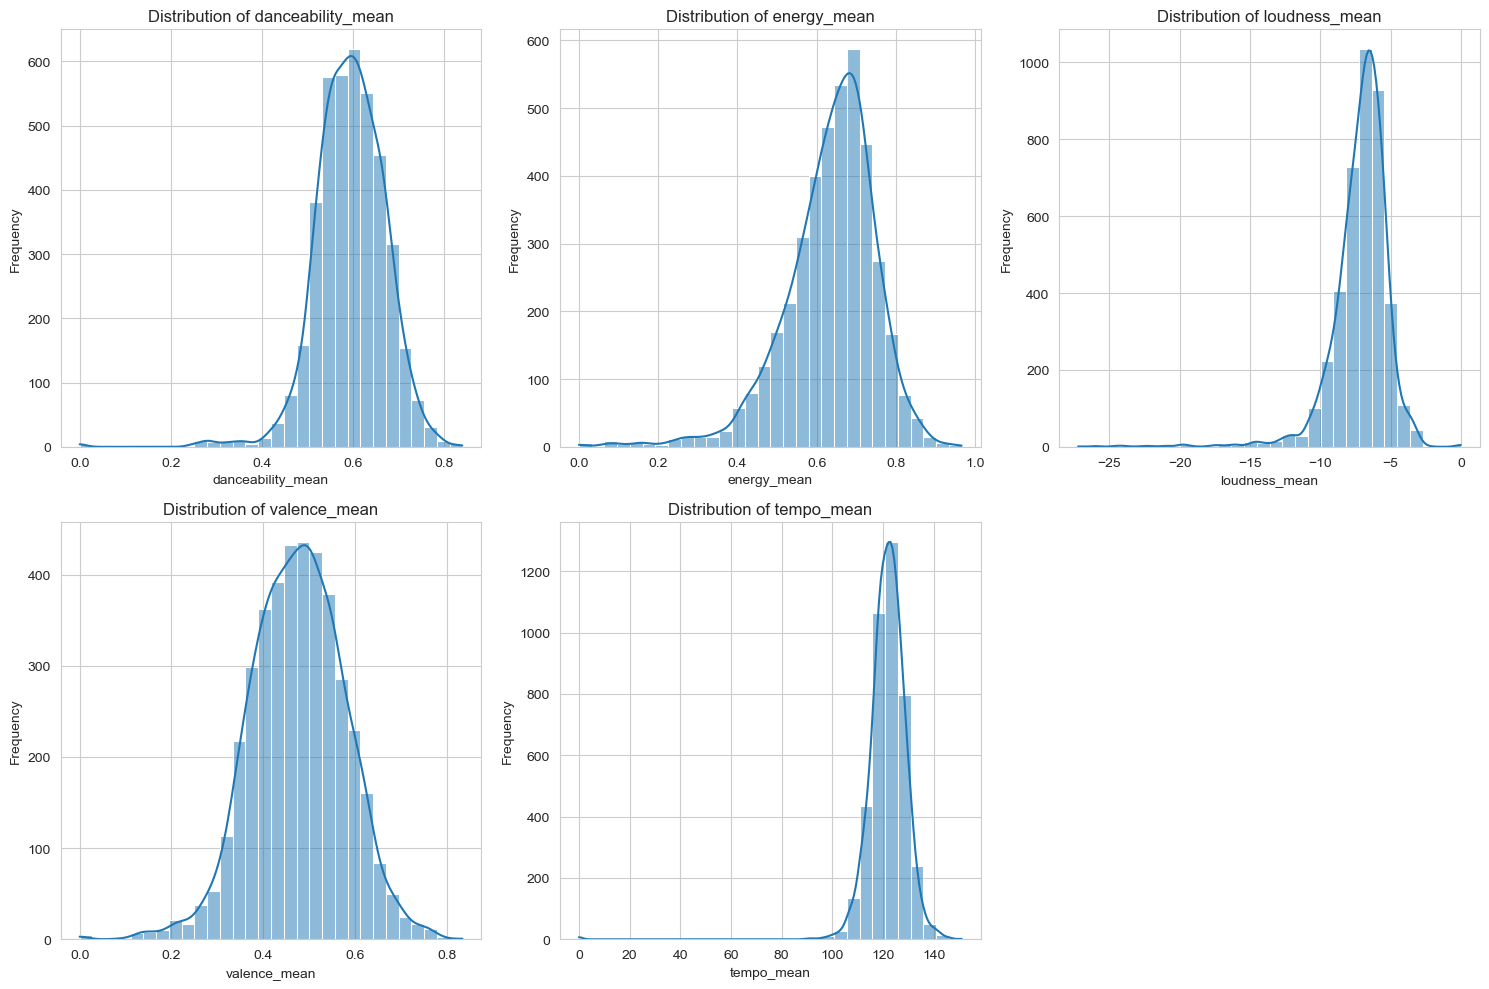

In [8]:
# Setting the aesthetics for the plots
sns.set_style("whitegrid")

# Selecting a subset of features for visualization
features_to_plot = ['danceability_mean', 'energy_mean', 'loudness_mean', 'valence_mean', 'tempo_mean']

# Creating histograms for the selected features
plt.figure(figsize = (15, 10))
for i, feature in enumerate(features_to_plot, 1): 
    plt.subplot(2, 3, i)
    sns.histplot(dataset[feature], kde = True, bins = 30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

The histograms above display the distributions of key numerical features within the dataset, including danceability mean, energy mean, loudness mean, valence mean, and tempo mean. Here are some observations: 

* **Danceability Mean**: The distribution appears to be slightly skewed towards higher values, indicating that a majority of the playlists tend to have tracks that are more danceable. 
* **Energy Mean**: This feature shows a more balanced distribution, suggesting a varied mix of high and low-energy tracks across playlists. 
* **Loudness Mean**: The distribution of loudness mean is skewed towards higher values (note that loudness is a negative dB value, so higher means less negative, or louder). Most playlist feature tracks with relatively higher loudness levels.
* **Valence Mean**: The valence mean, which measures the musical positiveness conveyed by a track, shows a broad distribution, indicating a diversity in the mood of the tracks across different playlists. 
* **Tempo Mean**: The tempo mean distribution is fairly normal, with most playlists having an average tempo around a central range. 

Now we will use a **correlation matrix** with a heatmap to identify relationships between the features. This will be crucial for understanding which characteristics might influence the MBTI classification.

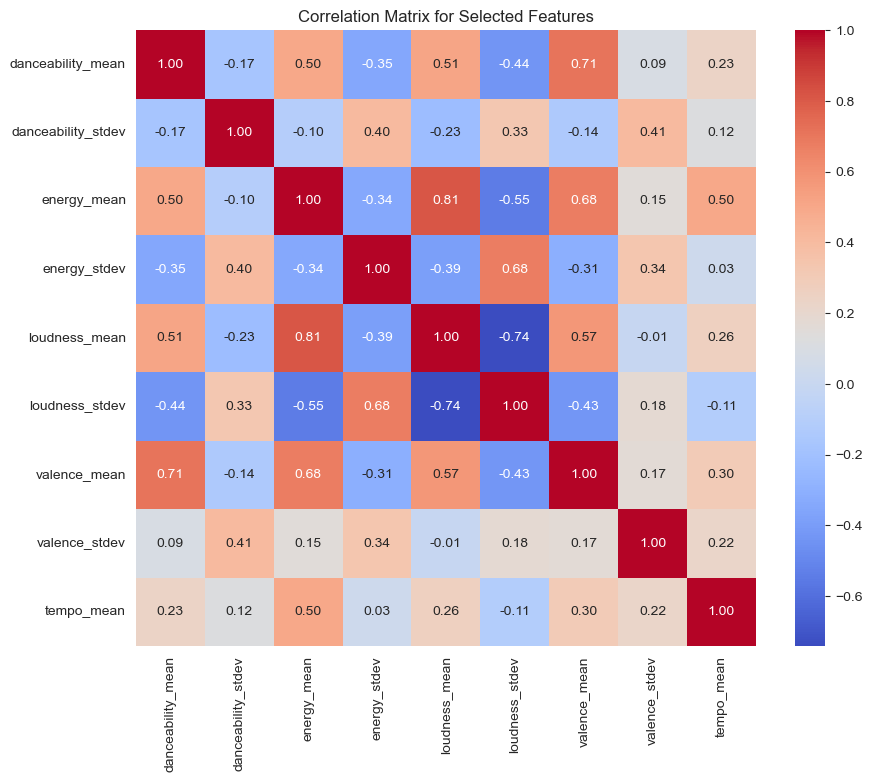

In [9]:
# Selecting a subset of features for the correlation analysis to manage complexity
subset_features = [
    'danceability_mean', 'danceability_stdev', 
    'energy_mean', 'energy_stdev', 
    'loudness_mean', 'loudness_stdev', 
    'valence_mean', 'valence_stdev', 
    'tempo_mean'
]

# Calculating the correlation matrix for the subset of numerical features
subset_corr_matrix = dataset[subset_features].corr()

# Plotting the heatmap for the subset correlation matrix
plt.figure(figsize = (10, 8))
sns.heatmap(subset_corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()

The correlation matrix above shows the relationship between different pairs of musical features. Hare are some observations: 

* **Strong Positive Correlations**: **danceability_mean** and **valence_mean** (0.71) shows that songs that are more danceable tend to also be perceived as having a more positive or happier mood. **energy_mean** and **loudness_mean** (0.81) show that louder songs tend to be more energetic. 
* **Strong Negative Correlations**: **loudness_stdev** and **loudness_mean** (-0.74) shows that there is a strong negative correlation between the mean and standard deviation of loudness, indicating that songs with a higher average loudness tend to have less variation in loudness.
* **Moderate Positive Correlations**: **danceability_mean** and **energy_mean** (0.50) shows that daneability and energy are moderately positively correlated, meaning that songs that are more danceable often have higher energy. **energy_mean** and **valence_mean** (0.58) shows that there's a moderate correlation indicating that songs with higher energy often have a more positive mood.
* **Moderate Negative Correlations**: **danceability_mean** and **danceability_stdev** (-0.17) shows that there is a slight tendency for songs that are more uniformly danceable to have a lower variation in danceability. **energy_mean** and **energy_stdev** (-0.34) shows that songs with higher average energy levels tend to have a lower variation in energy.
* **Low Correlation**: Some pairs of features, such as **valence_stdev** and **tempo_mean** (0.22), show low correlation, meaning there is little linear relationship between these variables.

### Modeling

We will now train the dataset on a test set without the mbti column, implementing cross-validation to assess the generalization capability. 


We will use a streamline preprocessing and model training. This helps ensure that scaling is appropriately fitted on the training data during each cross-validation fold.

In [10]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(dataset['mbti'])

# Prepare features (assuming all other columns are features and numerical)
X = dataset.drop(['mbti', 'function_pair'], axis=1)  # Adjust as necessary

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Replace infinities with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values
imputer = SimpleImputer(strategy="median")

# Fit on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Random Forest classifier within a pipeline
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

# Cross-validation
rf_cv_scores = cross_val_score(rf_pipeline, X_train_imputed, y_train, cv=5, error_score='raise')

print(f"Random Forest CV Scores: {rf_cv_scores}")
print(f"Average Score: {rf_cv_scores.mean()}")

Random Forest CV Scores: [0.28330781 0.25880551 0.27565084 0.28177642 0.29294479]
Average Score: 0.27849707344112595


We will split the training set into 5 smaller sets, and the model will be trained and validated 5 times. It will help us in assessing how the model will generalize to an independent dataset.

In [11]:
# SVM classifier within a pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(random_state=42))

# Cross-validation
svm_cv_scores = cross_val_score(svm_pipeline, X_train_imputed, y_train, cv=5)

print(f"SVM CV Scores: {svm_cv_scores}")
print(f"Average Score: {svm_cv_scores.mean()}")

SVM CV Scores: [0.27718224 0.26799387 0.29249617 0.28330781 0.30674847]
Average Score: 0.2855457116282566


The accuracy scores for both models are relatively low, suggesting that the task of predicting MBTI types based on playlist characteristics is challenging with the current feature set and model configurations. This is to be expected in complex multi-class classification problems, especially when dealing with nuanced and abstract concepts like personality types inferred from musical preferences.

Let's do feature transformation to ensure all numerical features are on a similar scale, which could have been why our SVM gave the scores it did.

In [13]:
# Defining the column transformer. We will apply StandardScaler to all 
# numerical columns and PolynomialFeatures to create interaction terms (degree = 2 for simplicity)
column_transformer = ColumnTransformer(transformers = [
    ('num', StandardScaler(), subset_features), 
    ('poly', PolynomialFeatures(degree = 2, include_bias = False), subset_features)
], remainder = 'passthrough')

# Apply the transformations
X_transformed = column_transformer.fit_transform(X)

# Checking the shape of the transformed data
X_transformed.shape

(4081, 98)

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Replace infinities with NaN
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)

# Impute missing values
imputer = SimpleImputer(strategy="median")

# Fit on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Random Forest classifier within a pipeline
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

# Cross-validation
rf_cv_scores = cross_val_score(rf_pipeline, X_train_imputed, y_train, cv=5, error_score='raise')

print(f"Random Forest CV Scores: {rf_cv_scores}")
print(f"Average Score: {rf_cv_scores.mean()}")

# SVM classifier within a pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(random_state=42))

# Cross-validation
svm_cv_scores = cross_val_score(svm_pipeline, X_train_imputed, y_train, cv=5)

print(f"SVM CV Scores: {svm_cv_scores}")
print(f"Average Score: {svm_cv_scores.mean()}")

Random Forest CV Scores: [0.2388974  0.237366   0.27565084 0.27871363 0.27760736]
Average Score: 0.2616470466652261
SVM CV Scores: [0.27411945 0.26033691 0.2863706  0.27258806 0.27760736]
Average Score: 0.2742044739240316


The scores indicate a slight deterioration for the SVM model and a decrease for the Random Forest model compared to the initial runs before the feature transformations. These results suggest that the transformations may have had a more negative impact on the SVM model, possibly due to its sensitivity to the scale and distribution of the input features. However, the overall performance remains relatively low, indicating that predicting MBTI types from playlist characteristics is a challenging problem and may require further refinement of the feature set, more sophisticated modeling techniques, or additional data.

### Results and Analysis

In my exploration to predict MBTI personality types from Spotify playlists, I employed two machine learning models: Random Forest and Support Vector Machine (SVM). Initial cross-validation results revealed the following average accuracies across five folds:

* Random Forest Model: 27.85%
* SVM Model: 28.55%

Upon applying feature transformations, including standardization and polynomial feature creation, the models achieved the following decreased accuracies:

* Transformed Random Forest Model: 26.16%
* Transformed SVM Model: 27.42%

Despite these transformations, the overall performance enhancement was modest, indicating the challenging nature of the problem and potential areas for further improvement.

To visually compare the performance of my models, I plotted the average cross-validation accuracy scores before and after feature transformation.

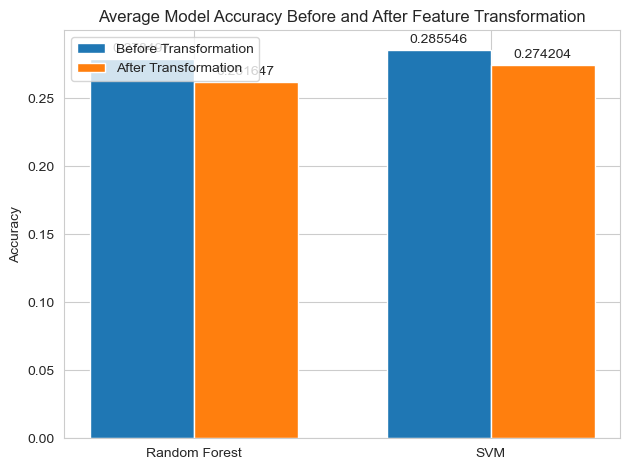

In [16]:

models = ['Random Forest', 'SVM']


accuracy_before = [0.27849707344112595, 0.2855457116282566]



accuracy_after = [0.2616470466652261, 0.2742044739240316]



x = np.arange(len(models))

width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_before, width, label='Before Transformation')
rects2 = ax.bar(x + width/2, accuracy_after, width, label='After Transformation')



ax.set_ylabel('Accuracy')
ax.set_title('Average Model Accuracy Before and After Feature Transformation')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [31]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train_imputed, y_train)

preds_rf = rf_model.predict(X_test)

svm_pipeline.fit(X_train_imputed, y_train)

preds_svm = svm_pipeline.predict(X_test)


f1_macro_rf = f1_score(y_test, preds_rf, average='macro')
f1_weighted_rf = f1_score(y_test, preds_rf, average='weighted')

f1_macro_svm = f1_score(y_test, preds_svm, average='macro')
f1_weighted_svm = f1_score(y_test, preds_svm, average='weighted')

print(f"Random Forest - Macro-average F1: {f1_macro_rf}, Weighted-average F1: {f1_weighted_rf}")
print(f"SVM - Macro-average F1: {f1_macro_svm}, Weighted-average F1: {f1_weighted_svm}")


Random Forest - Macro-average F1: 0.2764870048033455, Weighted-average F1: 0.30555456069089665
SVM - Macro-average F1: 0.2693628235088226, Weighted-average F1: 0.2965094774411435


In the evaluation of my models, I extended my metrics beyond accuracy to include the F1 score, which is particularly informative in the presence of class imbalance. The F1 score balances precision and recall, offering a harmonized view of model performance. Given the variability in class distribution across MBTI types, I computed both macro-average and weighted-average F1 scores for a comprehensive assessment. The macro-average F1 score treats all classes equally, averaging performance across classes, while the weighted-average F1 score accounts for class imbalance by weighting the F1 score of each class by its presence in the dataset.

The following F1 scores were observed for my models:

Random Forest Model:
* Macro-average F1: 0.2765
* Weighted-average F1: 0.3056

SVM Model:
* Macro-average F1: 0.2694
* Weighted-average F1: 0.2965

These F1 scores complement my accuracy findings, offering deeper insights into model performance. Notably, the Random Forest model exhibits slightly higher F1 scores compared to the SVM model, indicating a marginally better balance of precision and recall across the classes. This suggests that while SVM might hold a slight edge in accuracy, Random Forest could be more adept at managing the trade-off between precision and recall, particularly in the context of an imbalanced dataset.

The weighted-average F1 scores further highlight the models' ability to account for class imbalance, with both models showing improved scores over the macro-average. This underscores the importance of considering class distribution in evaluation and suggests that while neither model fully overcomes the challenges posed by class imbalance, Random Forest slightly outperforms SVM in terms of F1 score.

Throughout my analysis, I iterated over model training and feature engineering processes to enhance performance. The introduction of polynomial features aimed to capture non-linear relationships between musical attributes and MBTI types, albeit with limited success. This iterative process underscored the complexity of accurately predicting MBTI types from musical preferences and the need for deeper exploration into feature selection and model tuning.

Comparing the Random Forest and SVM models, I observed slightly higher performance with the SVM model, particularly before feature transformations. This suggests that SVM's ability to handle high-dimensional data and its sensitivity to feature scaling may offer advantages in this context. However, the marginal difference in performance also indicates that both models struggle with the inherent complexity of the task, suggesting that further model experimentation and possibly the integration of additional data sources or features could be beneficial.

My analysis demonstrates the challenging nature of predicting MBTI personality types from Spotify playlists. While SVM showed slight superiority, the overall performance of both models indicates room for significant improvement. Future directions could include:

* Incorporating textual analysis of playlist titles or song lyrics could offer additional predictive power.
* Exploring more complex models.
* Employing a broader set of evaluation metrics.

# Conclusion

This project highlights the intricate relationship between musical preferences and personality types, offering a fertile ground for further research and exploration in the intersection of music, psychology, and machine learning. I embarked on the ambitious journey of predicting MBTI personality types from Spotify playlists, leveraging the power of machine learning with models such as Random Forest and SVM. While the models provided foundational insights, the complexity of human personality and its expression through musical preferences posed significant challenges, as reflected in the modest performance metrics achieved.

* The nuanced relationship between musical features and MBTI types underscored the importance of thoughtful feature selection and engineering. 
* The comparison between Random Forest and SVM models illuminated the critical role of model selection in machine learning.
* Predicting psychological profiles from digital footprints is inherently challenging due to the abstract nature of psychological constructs and the diversity of human behavior.